<a href="https://colab.research.google.com/github/Anandharajan/DriverBehaviour/blob/master/autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Anandharajan/DriverBehaviour/master/autism.csv",sep = ",")

In [3]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism,contry_of_res,result,relation,asd
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,5,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern ',no,no,Jordan,5,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,5,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,4,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States',10,Parent,YES


In [4]:
df.autism.value_counts()

no     243
yes     49
Name: autism, dtype: int64

In [0]:
df['autism'] = df['autism'].apply(lambda x: 0 if x=='no' else 1)

In [0]:
df['asd'] = df['asd'].apply(lambda x: 0 if x=='NO' else 1)

In [0]:
countNoAutism = len(df[df.autism == 0])
countHaveAutism = len(df[df.autism == 1])
print("Percentage of Patients Haven't Autism: {:.2f}%".format((countNoAutism / (len(df.autism))*100)))
print("Percentage of Patients Have Autism: {:.2f}%".format((countHaveAutism / (len(df.autism))*100)))

Percentage of Patients Haven't Autism: 83.22%
Percentage of Patients Have Autism: 16.78%


In [0]:
countNoASD = len(df[df.asd == 0])
countHaveASD = len(df[df.asd == 1])
print("Percentage of Patients Haven't ASD: {:.2f}%".format((countNoASD / (len(df.asd))*100)))
print("Percentage of Patients Have ASD: {:.2f}%".format((countHaveASD / (len(df.asd))*100)))

Percentage of Patients Haven't ASD: 51.71%
Percentage of Patients Have ASD: 48.29%


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


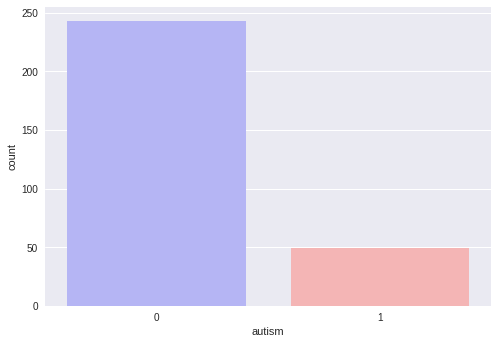

In [0]:
sns.countplot(x="autism", data=df, palette="bwr")
plt.show()

In [0]:
df['gender'] = df['gender'].apply(lambda x: 0 if x=='f' else 1)

In [0]:
df.gender.value_counts()

1    292
Name: gender, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


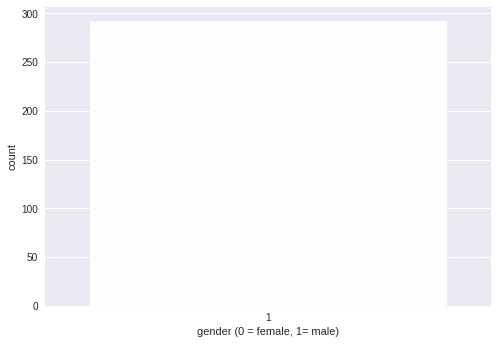

In [0]:
sns.countplot(x="gender", data=df, palette="bwr")
plt.xlabel("gender (0 = female, 1= male)")
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

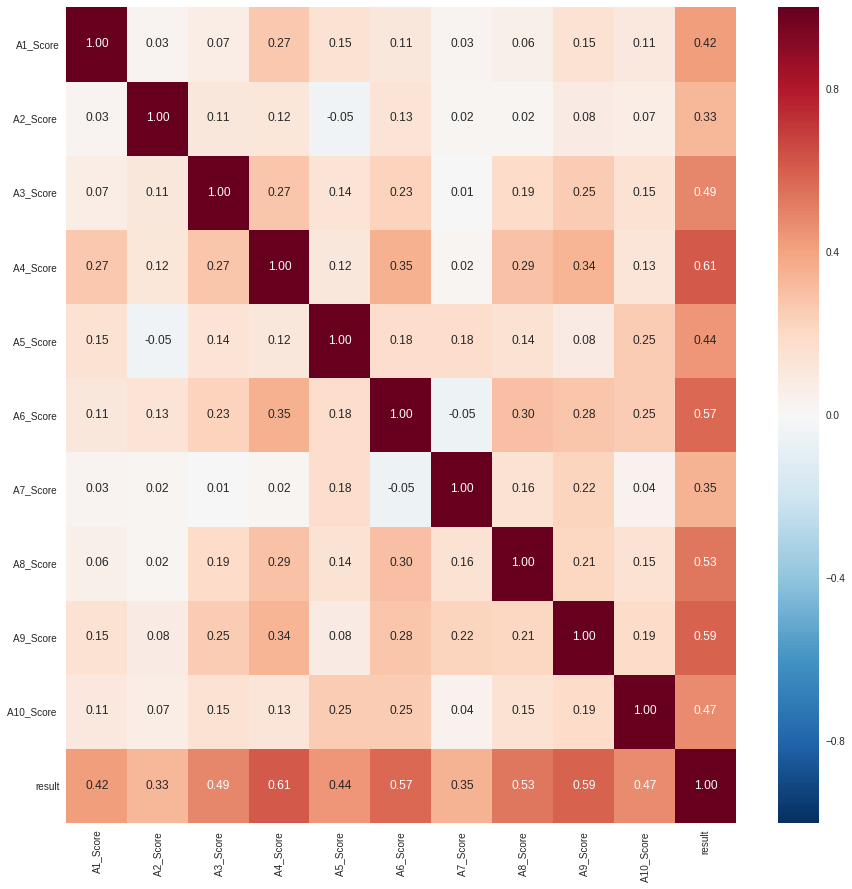

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [0]:
X = df.drop(['A1_Score'], axis=1)
y = df['A1_Score']

In [11]:
for attr in X.columns:
    print('\n*', attr, '*')
    print(X[attr].value_counts())


* A2_Score  *
1    156
0    136
Name: A2_Score , dtype: int64

* A3_Score  *
1    217
0     75
Name: A3_Score , dtype: int64

* A4_Score  *
1    161
0    131
Name: A4_Score , dtype: int64

* A5_Score  *
1    217
0     75
Name: A5_Score , dtype: int64

* A6_Score  *
1    208
0     84
Name: A6_Score , dtype: int64

* A7_Score  *
1    177
0    115
Name: A7_Score , dtype: int64

* A8_Score  *
0    147
1    145
Name: A8_Score , dtype: int64

* A9_Score  *
0    148
1    144
Name: A9_Score , dtype: int64

* A10_Score  *
1    212
0     80
Name: A10_Score , dtype: int64

* age *
4     92
5     45
6     39
7     27
11    26
8     21
9     20
10    18
?      4
Name: age, dtype: int64

* gender *
m    208
f     84
Name: gender, dtype: int64

* ethnicity *
White-European      108
Asian                46
?                    43
Middle Eastern '     27
South Asian'         21
Black                14
Others               14
Latino                8
Hispanic              7
Pasifika              2
Turki

In [0]:
X.drop(['veil-type'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


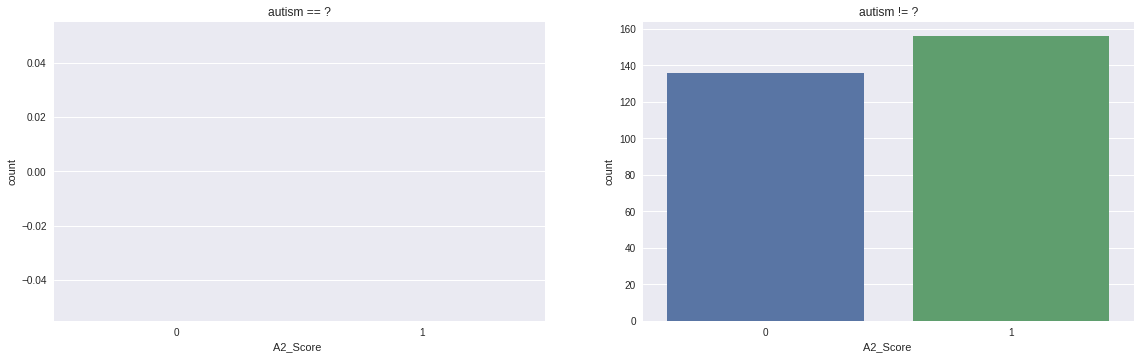

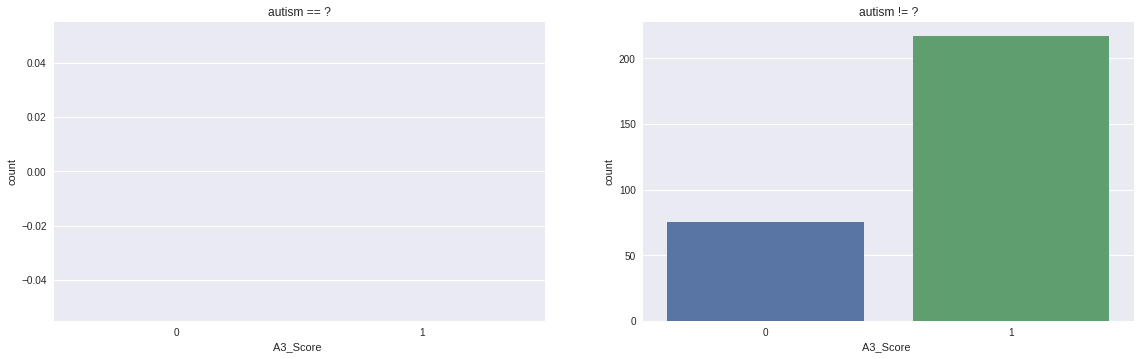

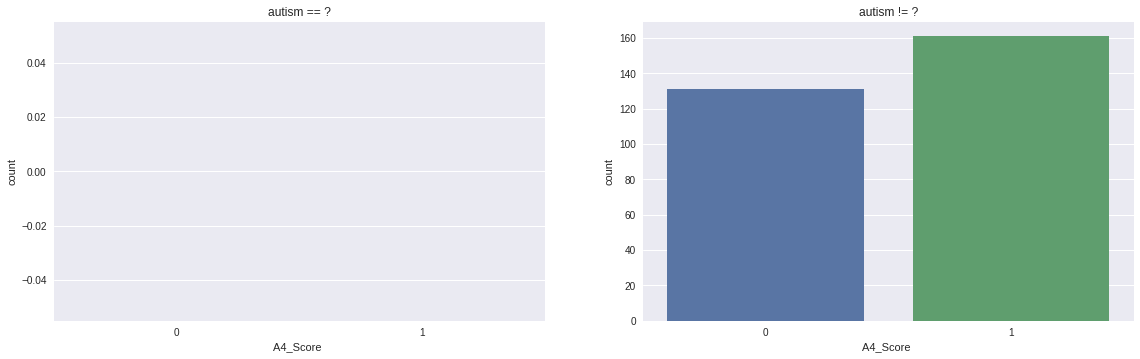

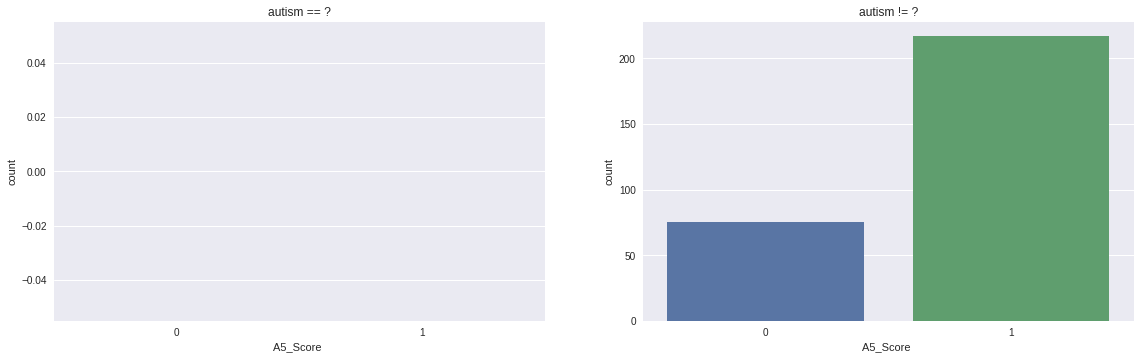

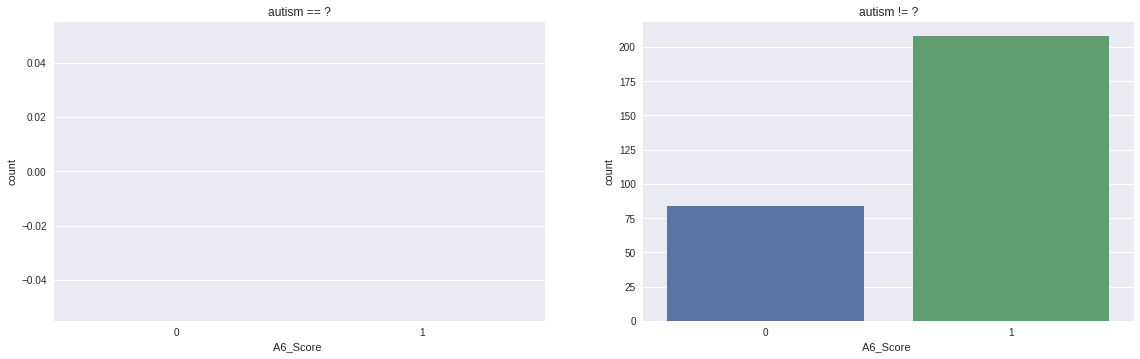

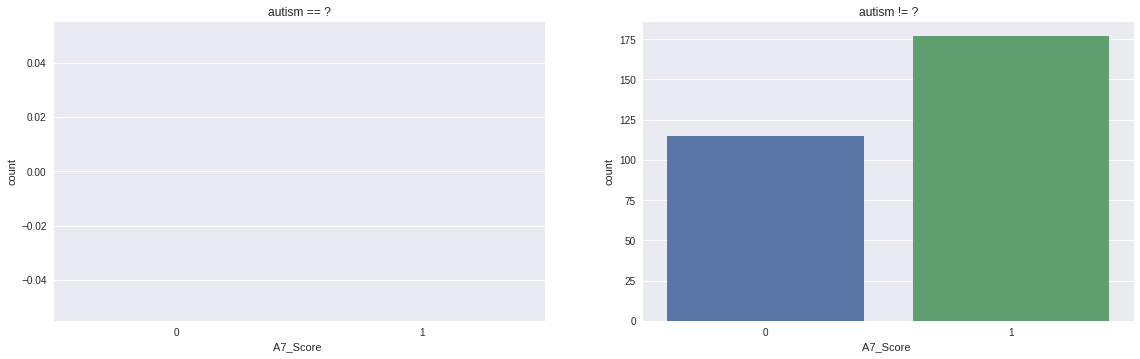

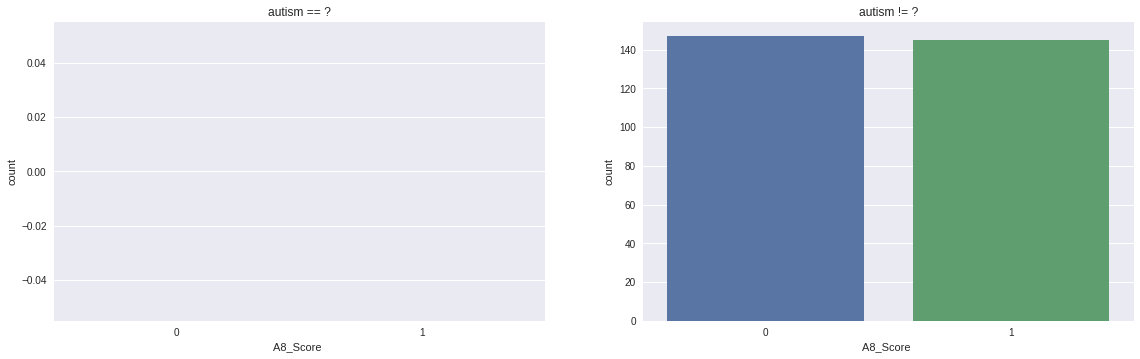

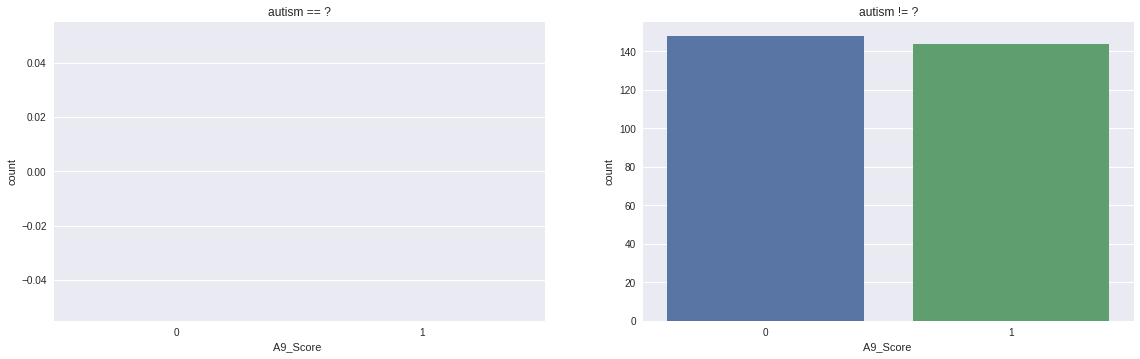

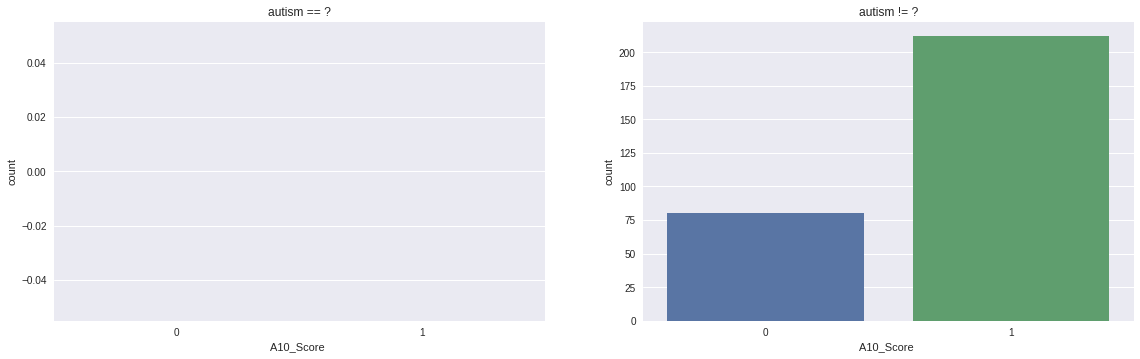

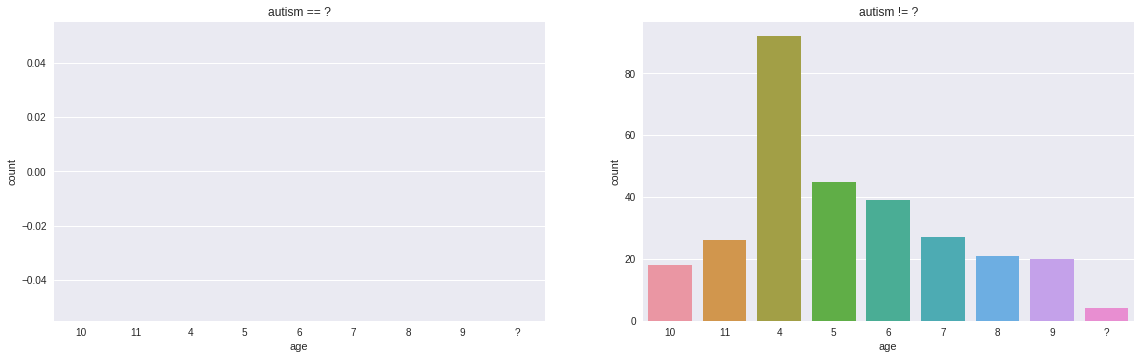

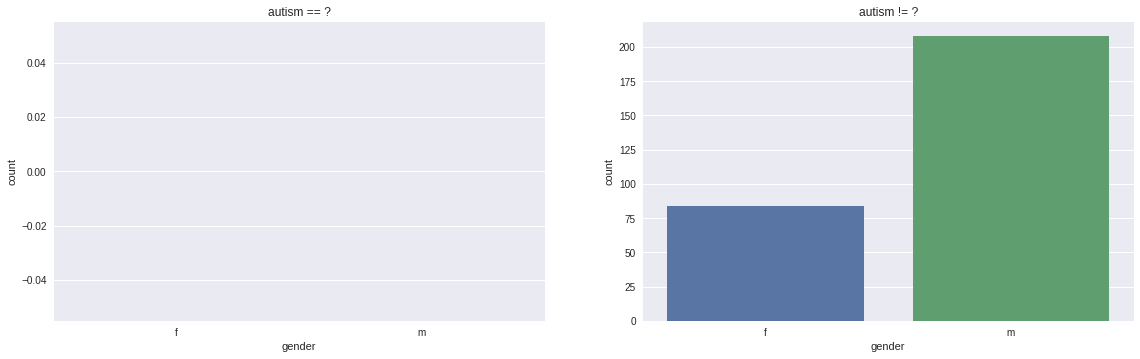

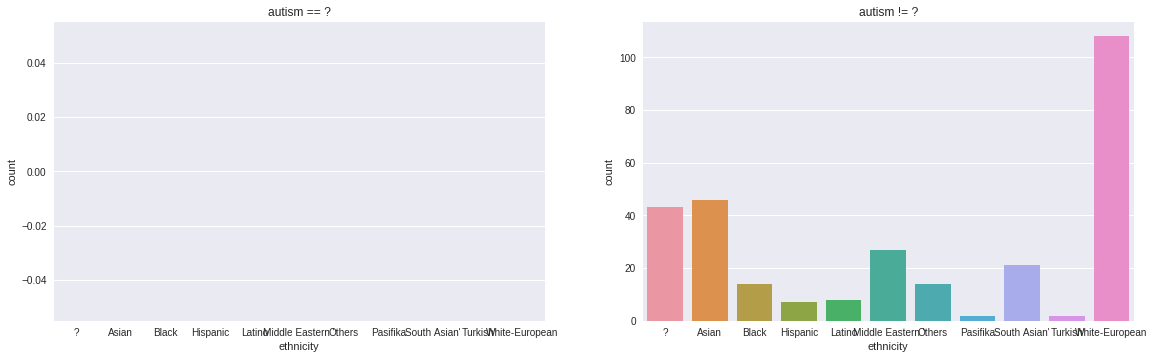

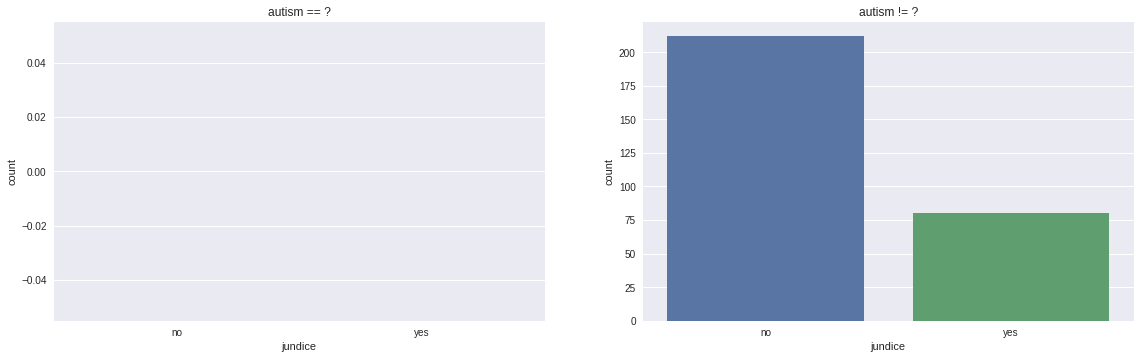

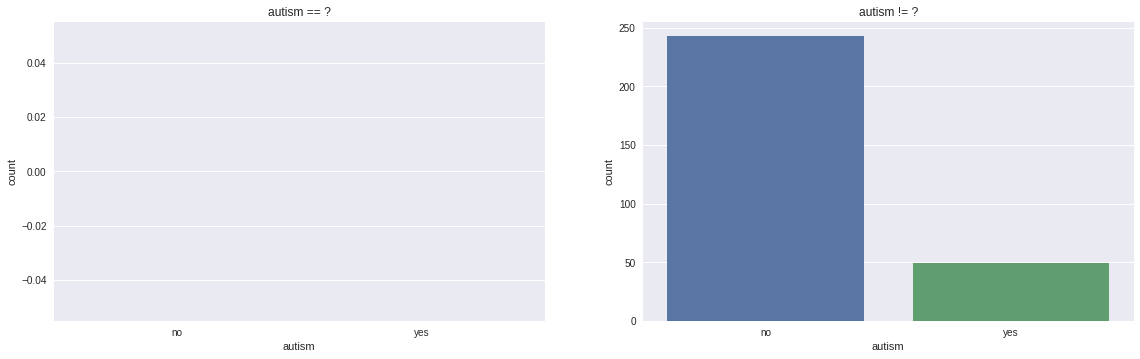

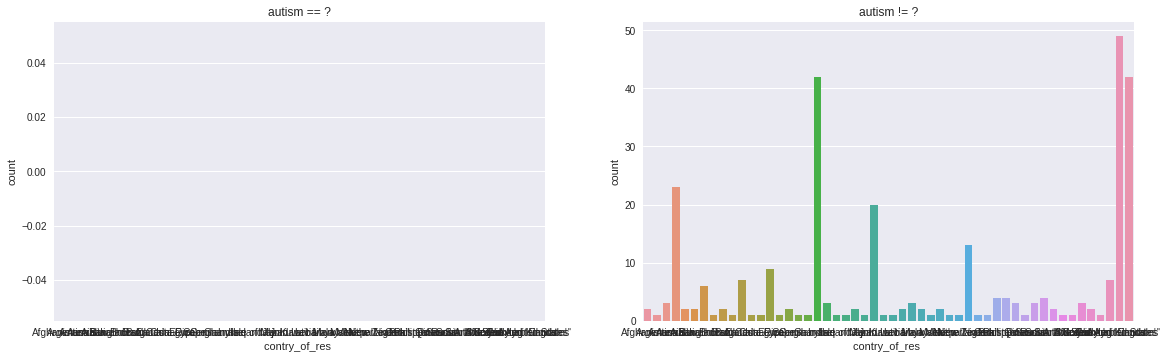

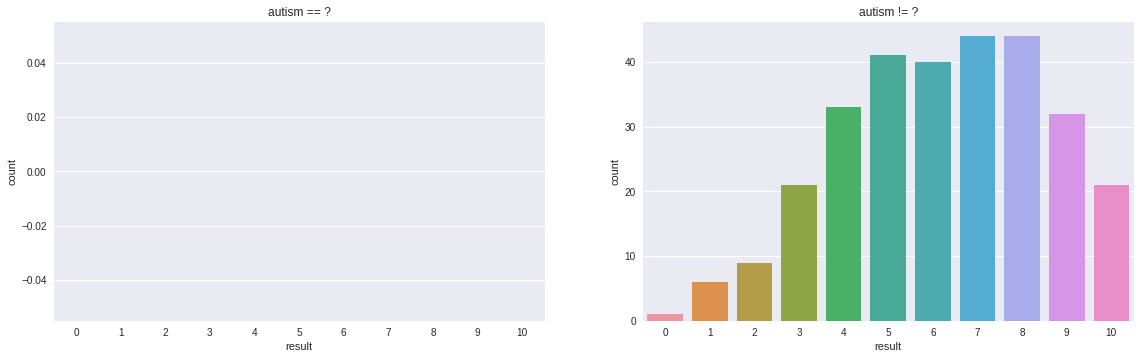

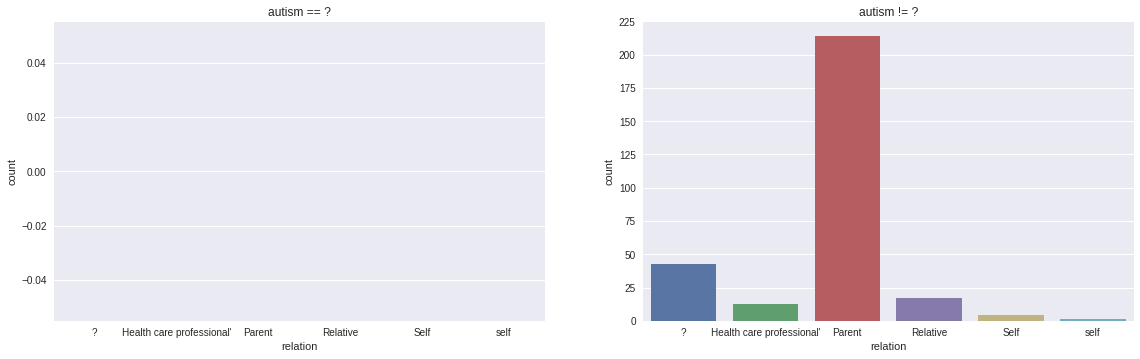

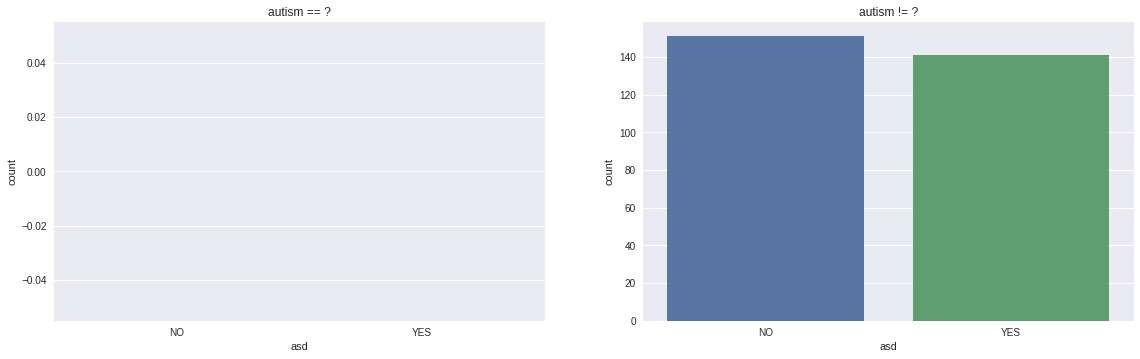

In [12]:
for attr in X.columns:
    #Format subplots
    fig, ax = plt.subplots(1,2)
    plt.subplots_adjust(right=2)
    
    #Construct values to count in each column
    a=set(X[X['autism']=='?'][attr])
    b=set(X[X['autism']!='?'][attr])
    c = a.union(b)
    c = np.sort(np.array(list(c)))
    
    #Build each subplot
    sns.countplot(x=X[X['autism']=='?'][attr], order=c, ax=ax[0]).set_title('autism == ?')
    sns.countplot(x=X[X['autism']!='?'][attr], order=c, ax=ax[1]).set_title('autism != ?')
    
    #Plot the plots
    fig.show()
